In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Warm-up (4 points)

## 1.1 Creating Matrices (0.25 points)

Create 4 matrices
- A - a "checkerboard" matrix of zeros and ones, size 6x3, with the top-left value (A[0][0]) equal to 1,
- В - a matrix of numbers from 1 to 24, arranged in a snake-like pattern, size 6x4,
- C - a matrix of random integers from 2 to 10 (inclusive), size 4x3,
- D - a matrix of zeros with ones on the main diagonal, size 4x4.

**Create a “patchwork” matrix S from these matrices**

A В

С D

using **only standard** numpy operations. Do not use Comprehensions.

Then, append matrix **F** of size 10x2 filled with zeros to the resulting matrix **S** to create matrix **G**:

S F

Note: When we say a matrix has a size of x by y, x is the number of rows, and y is the number of columns.

In [ ]:
A = np.zeros((6, 3), dtype=int)
A[::2, ::2] = 1
A[1::2, 1::2] = 1

B = np.arange(1, 25).reshape(6, 4)
B[1::2] = B[1::2, ::-1]

np.random.seed(42)
C = np.random.randint(2, 11, size=(4, 3))

D = np.eye(4, dtype=int)

upper = np.hstack((A, B))
lower = np.hstack((C, D))

S = np.vstack((upper, lower))

F = np.zeros((10, 2), dtype=int)

G = np.hstack((S, np.vstack((F, np.zeros((S.shape[0] - F.shape[0], 2), dtype=int)))))

print("A:")
print(A)
print("\nB:")
print(B)
print("\nC:")
print(C)
print("\n D:")
print(D)
print("\n S:")
print(S)
print("\n F:")
print(F)
print("\n G:")
print(G)


A:
[[1 0 1]
 [0 1 0]
 [1 0 1]
 [0 1 0]
 [1 0 1]
 [0 1 0]]

B:
[[ 1  2  3  4]
 [ 8  7  6  5]
 [ 9 10 11 12]
 [16 15 14 13]
 [17 18 19 20]
 [24 23 22 21]]

C:
[[8 5 9]
 [6 8 4]
 [8 9 6]
 [5 9 9]]

 D:
[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]

 S:
[[ 1  0  1  1  2  3  4]
 [ 0  1  0  8  7  6  5]
 [ 1  0  1  9 10 11 12]
 [ 0  1  0 16 15 14 13]
 [ 1  0  1 17 18 19 20]
 [ 0  1  0 24 23 22 21]
 [ 8  5  9  1  0  0  0]
 [ 6  8  4  0  1  0  0]
 [ 8  9  6  0  0  1  0]
 [ 5  9  9  0  0  0  1]]

 F:
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]

 G:
[[ 1  0  1  1  2  3  4  0  0]
 [ 0  1  0  8  7  6  5  0  0]
 [ 1  0  1  9 10 11 12  0  0]
 [ 0  1  0 16 15 14 13  0  0]
 [ 1  0  1 17 18 19 20  0  0]
 [ 0  1  0 24 23 22 21  0  0]
 [ 8  5  9  1  0  0  0  0  0]
 [ 6  8  4  0  1  0  0  0  0]
 [ 8  9  6  0  0  1  0  0  0]
 [ 5  9  9  0  0  0  1  0  0]]


## 1.2 Finding the Nearest Neighbor (0.25 points)

Implement a function that takes a matrix **X** and a number **a** and returns the element in the matrix closest to the given number.
   
For example, for **X = np.arange(0, 10).reshape((2, 5))** and **a = 3.6**, the answer will be 4. You can only use basic numpy functions, **do not use loops**.

In [ ]:
def find_nearest_neighbour(X, a):
    differences = np.abs(X-a)
    index = np.argmin(differences)
    return X.flat[index]

## 1.3 Very Strange Neural Network (0.25 points)

Implement a strange neural network. The network should:

- Square matrix **A** (the weight matrix) of size N x N.
- In the first transformation, multiply a vector **X** of length N (feature vector) by the weight matrix **A^2** (the output will be a new vector).
- In the second transformation, multiply the resulting vector by vector **b** (weight vector) of size N to produce a scalar value.

Assume that all elements in matrices and vectors are floating-point numbers.

In [ ]:
N = 4
A = np.random.rand(N, N)
b = np.random.rand(N)
X = np.random.rand(N)

def very_strange_neural_network(A, b, X):
    A_squared = np.matmul(A, A)
    Y = np.matmul(A_squared, X)
    Z = np.sum(Y * b)
    return Z

print("A = ")
print(A)
print("\nb = ")
print(b)
print("\nX = ")
print(X)
print("\n")
print(very_strange_neural_network(A, b, X))


A = 
[[0.60441738 0.53984109 0.20306122 0.94285357]
 [0.59886547 0.69478493 0.88046784 0.62435405]
 [0.29563369 0.10549426 0.45653457 0.21844044]
 [0.41650995 0.88328026 0.32434502 0.12208795]]

b = 
[0.35629784 0.90682844 0.27213225 0.64769012]

X = 
[0.00052038 0.35256886 0.30478126 0.16465585]


2.0334983896479413


## 1.4 The Jungle Calls! (0.25 points)

You are given a matrix **M**, a map of an impassable jungle terrain created by Lara Croft. Each cell in the map is an integer representing the height above sea level (if positive) in meters or the sea depth (if negative) in meters in a one-meter-by-one-meter area of the map. If the number is 0, it represents land - a shoreline.

You need to calculate:
- The total area of cells in the sea where the depth is greater than 5 (in m^2).
- The total volume of water on the map (in m^3).
- The maximum height above sea level on this map (in m).

In [ ]:
def find_deep_sea_area(M):
    return np.sum(M < -5)

def find_water_volume(M):
    return np.abs(M[M < 0]).sum()

def find_max_height(M):
    return np.max(M[M > 0])

In [ ]:
# You can create your own example.
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])

# simple check for the example above
assert np.isclose(find_deep_sea_area(M), 1)
assert np.isclose(find_water_volume(M), 21)
assert np.isclose(find_max_height(M), 25)

print("Total sea area on the map -", find_deep_sea_area(M), "м^2")
print("Total water volume on the map -", find_water_volume(M), "м^3")
print("Maximum elevation on the map -", find_max_height(M), "м")

Total sea area on the map - 1 м^2
Total water volume on the map - 21 м^3
Maximum elevation on the map - 25 м


## 1.5 Treasure Islands (0.25 points)


The function takes an array **a** of zeros and ones as input. Count the number of consecutive blocks of ones (islands) in the array. Only basic numpy functions are allowed, **no loops**.

Hint: check what `np.diff` does.

In [ ]:
def count_all_islands(a):
    transitions = np.diff(a)
    island_starts = transitions == 1
    return np.sum(island_starts)

In [ ]:
# можно подставить свой пример

a = np.array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

# простая проверка для примера выше
assert count_all_islands(a) == 4
print(count_all_islands(a))

4


## 1.6 Masquerade (0.25 points)

The input is a 2D matrix **X** filled with floating-point numbers and a floating-point number **a**. Replace all cells in the matrix greater than **a** with the average value of the elements in **X**.

**You must** use basic numpy functions, **no loops**.

In [ ]:
def swap_mask_for_average(X, a):
    avg = np.mean(X)
    X_ = np.copy(X)
    mask = X_ > a
    X_[mask] = avg
    return X_

In [ ]:
# You can create your own example.
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])
a = 5

# simple check for the example above
assert np.allclose(swap_mask_for_average(M, a),
                   np.array([
                       [-7, -3, -1, 0],
                       [-4, -3, 1, 2],
                       [-2, 0, 4, 2],
                       [-1, 3, 2, 2]
                   ]))

swap_mask_for_average(M, a)

array([[-7, -3, -1,  0],
       [-4, -3,  1,  2],
       [-2,  0,  4,  2],
       [-1,  3,  2,  2]])

## 1.7 Hot on the Trails (0.25 points)

The input is a square matrix **M**. Calculate the difference between the sum along the main diagonal and the secondary diagonal.

Only basic numpy functions are allowed, **no loops**.

Hint: look up `np.trace`.

In [ ]:
def count_trace_diff(M):
    main_diag_sum = np.trace(M)
    secondary_diag_sum = np.trace(np.fliplr(M))
    return main_diag_sum - secondary_diag_sum

In [ ]:
# You can create your own example.
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])

# simple check for the example above
assert np.allclose(count_trace_diff(M), 3)

count_trace_diff(M)

3

## 1.8 King of the Hill (0.25 points)

The input is a vector a of size N. Using addition, concatenation, and broadcasting, create a symmetric matrix of size 2N x 2N with the maximum value in the center and decreasing values toward the edges.

Example: a = (0, 1, 2)

Result:

0 1 2 2 1 0 \\
1 2 3 3 2 1 \\
2 3 4 4 3 2 \\
2 3 4 4 3 2 \\
1 2 3 3 2 1 \\
0 1 2 2 1 0 \\

In [ ]:
def create_mountain(a):
    a_ext = np.concatenate((a, a[::-1]))
    mountain = a_ext[:, None] + a_ext
    return mountain

In [ ]:
# You can create your own example.
a = np.array([0, 1, 2, 3, 4])

create_mountain(a)

array([[0, 1, 2, 3, 4, 4, 3, 2, 1, 0],
       [1, 2, 3, 4, 5, 5, 4, 3, 2, 1],
       [2, 3, 4, 5, 6, 6, 5, 4, 3, 2],
       [3, 4, 5, 6, 7, 7, 6, 5, 4, 3],
       [4, 5, 6, 7, 8, 8, 7, 6, 5, 4],
       [4, 5, 6, 7, 8, 8, 7, 6, 5, 4],
       [3, 4, 5, 6, 7, 7, 6, 5, 4, 3],
       [2, 3, 4, 5, 6, 6, 5, 4, 3, 2],
       [1, 2, 3, 4, 5, 5, 4, 3, 2, 1],
       [0, 1, 2, 3, 4, 4, 3, 2, 1, 0]])

## 1.9 Monochrome Photograph 9x12 (0.5 points)

The input is a 2D matrix **P** of size N x M filled with numbers from 0 to 255, representing a grayscale photograph, and a natural number **C**. You need to produce a matrix of size (N - C + 1) x (M - C + 1), where each cell is the average value of the corresponding sub-matrix of size **C x C**. Essentially, this will apply a simple blur effect (slightly reducing its size).

In [ ]:
def custom_blur(P, C):
    S = np.cumsum(np.cumsum(P, axis=0), axis=1)
    n, m = P.shape
    result = np.zeros((n-C+1, m-C+1))
    for i in range(C-1, n):
        for j in range(C-1, m):
            total = S[i, j]
            if i >= C:
                total -= S[i-C, j]
            if j >= C:
                total -= S[i, j-C]
            if i >= C and j >= C:
                total += S[i-C, j-C]
            result[i-C+1, j-C+1] = total / (C * C)

    return result

In [ ]:
# You can create your own example.
P = np.arange(0, 12).reshape((3, 4))
kernel = 2

# simple check for the example above
assert np.allclose(custom_blur(P, kernel),
                   np.array([[2.5, 3.5, 4.5], [6.5, 7.5, 8.5]]))
custom_blur(P, 2 )

array([[2.5, 3.5, 4.5],
       [6.5, 7.5, 8.5]])

## 1.10 Validation Function (0.75 points)

The input to the function is an arbitrary number (>2) of tuples representing the shapes of different matrices. The function should return True if the matrices can be sequentially added together (possibly using broadcasting), and False otherwise.

In [ ]:
def check_successful_broadcast(*matrices):
    shapes = [shape[::-1] for shape in matrices]
    resultant_shape = shapes[0]

    for shape in shapes[1:]:
        new_resultant = []
        for r, s in zip(resultant_shape, shape):
            if r != s and r != 1 and s != 1:
                return False
            new_resultant.append(max(r, s))
        new_resultant.extend(resultant_shape[len(shape):] if len(resultant_shape) > len(shape) else shape[len(resultant_shape):])

        resultant_shape = new_resultant
    return True

In [ ]:
assert check_successful_broadcast((5, 6, 7), (6, 7), (1, 7))
# You can test with your examples
if check_successful_broadcast((5, 6, 7), (6, 7), (1, 7)):
    print("True")
else:
    print("False")

True


## 1.11 Pairwise Distances (0.75 points)

The input is matrices A of size m x k and B of size n x k. Create a matrix of size m x n containing pairwise Euclidean distances.

Only use basic functions, do not use loops or third-party libraries. Broadcasting will probably be useful. The solution must be **in one line**, following all code style rules.

In [ ]:
def pairwise_distances(A, B):
    return np.sqrt(((A[:, np.newaxis, :]-B[np.newaxis, :, :]) ** 2).sum(axis=2))

In [ ]:
A = np.array([[1, 2], [3, 4], [5, 6]])
B = np.array([[1, 0], [0, 1]])
print(pairwise_distances(A, B))

[[2.         1.41421356]
 [4.47213595 4.24264069]
 [7.21110255 7.07106781]]


Explain the logic behind this one-liner. What exactly is happening?

<font color='green'> Using the formula to compute the pairwise Euclidean distances between rows of matrices A and B:  </font>

<font color='blue'> d(i,j)= √∑ (A[i,k] - B[j,k])² </font>

<font color='green'> and broadcasting to avoid loop  </font>

# 2. Data Experiment Processing (3 points)

Ladies and gentlemen, now we're going to learn to use libraries for data analysis in real-life scenarios!

**The reason behind this section is simple**: many students in the Faculty of Physics and Mathematics still rely on Excel, calculators, or pen and paper even in their second or third semesters. Our goal is to introduce another method for conducting laboratory work with a much lower entry barrier than Excel itself. We hope this motivates some to explore these handy libraries further.

*Data sponsor for this section - blacksamorez. Without them, five happy semesters of labs would have been far less joyful...*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##  2.1. Problem Statement and Data

Let's assume we have a gyroscope with a weight attached to its axis on an arm (see the diagram for a quick understanding, and you can find more details in the [laboratory manual](https://lib.mipt.ru/book/267519/), volume 1, p.160). Due to the weight, the gyroscope begins to slowly [precess](https://en.wikipedia.org/wiki/Precession), i.e., it rotates around the vertical axis with a relatively constant frequency.

We'll work through part of this lab, primarily focusing on data processing and plotting graphs.

<center><img src='https://drive.google.com/uc?export=view&id=1KfYQ0hKYRDhi5uk7C8lNffZBNy8NF7nu' width=600>

Diagram of the gyroscope with the attached weight G and arm C</center>

First, let's examine the data someone has kindly gathered for us. Create a dataframe from [this file](https://drive.google.com/file/d/1SbLR6R16obqLewUTnX1CAAjQTrVXh2Vq/view?usp=sharing)

In [ ]:
file_url = "https://drive.google.com/uc?export=download&id=1SbLR6R16obqLewUTnX1CAAjQTrVXh2Vq"
data = pd.read_csv(file_url)
print(data.head())

   Unnamed: 0  N  t, sec  sigma_t, sec  mass, gramm  length, cm  phi, rad
0           1  4     268             1        180.0       121.0      0.16
1           2  4     264             1        180.0       121.0      0.18
2           3  4     275             1        180.0       121.0      0.16
3           4  4     263             1        180.0       121.0      0.17
4           5  4     267             1        180.0       121.0      0.17


## 2.2 Working with Data

The columns in the dataframe are as follows:

- N: Number of full gyroscope rotations in the experiment;
- t, in seconds: Time of the experiment;
- σ_t: Measurement error in time;
- mass: Mass of the weight attached to the arm on the gyroscope;
- length: Length of the previously mentioned arm;
- phi: Angle in radians by which the arm dropped during the experiment. This will help us estimate the effect of friction in the gyroscope on precession.

Since physicists like to work with properly dimensioned quantities, convert the mass columns to kilograms and length to meters. Then rename all columns to exclude references to units—use only the names of physical quantities.

In [ ]:
data['mass, gramm'] = data['mass, gramm'] / 1000
data['length, cm'] = data['length, cm'] / 100

data.rename(columns={
    'N': 'N',
    't, sec': 'time',
    'sigma_t, sec': 'time_error',
    'mass, gramm': 'mass',
    'length, cm': 'length',
    'phi, rad': 'phi'
}, inplace=True)

data = data.drop(columns=['Unnamed: 0'], errors='ignore')

data.head()


,N,time,time_error,mass,length,phi
0,4,268,1,0.18,1.21,0.16
1,4,264,1,0.18,1.21,0.18
2,4,275,1,0.18,1.21,0.16
3,4,263,1,0.18,1.21,0.17
4,4,267,1,0.18,1.21,0.17


Add new columns to the dataframe with the corresponding names and values, calculated using these formulas:

`omega`: $\Omega = 2 \pi \cdot \frac{N}{t}$

`sigma_omega`: $\sigma_{\Omega} = \Omega / t \cdot \sigma_t$

`omega_down`: $\Omega_{down} = \varphi / t$

`sigma_down`: $\Omega_{down} \cdot \sigma_t / t$

`momentum`: $M = m \cdot g \cdot l$ (`g = 9.8 м/с^2`)

`momentum_down`: $M_{down} = m \cdot \frac{\varphi}{t^2} \cdot l^2$

`sigma_momentum`: $\sigma_{M} = M_{down} \cdot 2 \cdot \frac{\sigma_t}{t}$


In [ ]:
g = 9.8

data['omega'] = 2 * np.pi * data['N'] / data['time']

data['sigma_omega'] = data['omega'] / data['time'] * data['time_error']

data['omega_down'] = data['phi'] / data['time']

data['sigma_down'] = data['omega_down'] * data['time_error'] / data['time']

data['momentum'] = data['mass'] * g * data['length']

data['momentum_down'] = data['mass'] * data['phi'] * (data['time'] ** 2) * (data['length'] ** 2)

data['sigma_momentum'] = data['momentum_down'] * 2 * data['time_error'] / data['time']

data.head()


,N,time,time_error,mass,length,phi,omega,sigma_omega,omega_down,sigma_down,momentum,momentum_down,sigma_momentum
0,4,268,1,0.18,1.21,0.16,0.093779,0.000350,0.000597,0.000002,2.13444,3028.536530,22.601019
1,4,264,1,0.18,1.21,0.18,0.095200,0.000361,0.000682,0.000003,2.13444,3306.158001,25.046652
2,4,275,1,0.18,1.21,0.16,0.091392,0.000332,0.000582,0.000002,2.13444,3188.809800,23.191344
3,4,263,1,0.18,1.21,0.17,0.095562,0.000363,0.000646,0.000002,2.13444,3098.872187,23.565568
4,4,267,1,0.18,1.21,0.17,0.094130,0.000353,0.000637,0.000002,2.13444,3193.851282,23.923980


You may have already wondered why the experiments with the same mass are repeated so many times. To achieve more stable results, of course! Now calculate the average values of the columns `omega`, `σ_omega`, `momentum`, and `momentum_down` for each unique mass.


**Hint:** The groupby function will help you here. No loops allowed!

In [ ]:
grouped_data = data.groupby('mass')[
    ['omega', 'sigma_omega', 'momentum', 'momentum_down']
].mean()

grouped_data.head()


,omega,sigma_omega,momentum,momentum_down
mass,,,,
0.142,0.066661,0.000236,1.683836,2627.357815
0.180,0.094012,0.000352,2.134440,3163.245560
0.216,0.081687,0.000354,2.286144,2203.144077
0.273,0.143300,0.000817,3.263988,2050.377644
0.341,0.150752,0.000723,3.675980,2974.358601


## 2.3 Simple Graphs and Least Squares Method (LSM)

It's now time to reintroduce the Least Squares Method (LSM). Of course, we won't make you write LSM yourself! <s>We're not that cruel</s>

In NumPy, the function [np.polyfit](https://numpy.org/devdocs/reference/generated/numpy.polyfit.html) calculates a polynomial of a given degree that best fits `y(x)` using LSM for the provided `x`, `y`, and degree `p`.

The function [np.polyval](https://numpy.org/devdocs/reference/generated/numpy.polyval.html) evaluates the polynomial `P(x)` with given coefficients.

Your task is to plot the dependence $\Omega (M)$ (angular velocity on moment of inertia). The graph should include experimental points and a line fitted using the least squares method. In the legend, include the polynomial with the calculated coefficients. Don't forget to label the axes (font size 14), add a grid, and provide a suitable title (font size 18)!

<center><img src='https://drive.google.com/uc?export=view&id=1xumON0195iA4HGSqvpS0FAhPGxuCdKH8' width=600>

Example of the resulting graph</center>

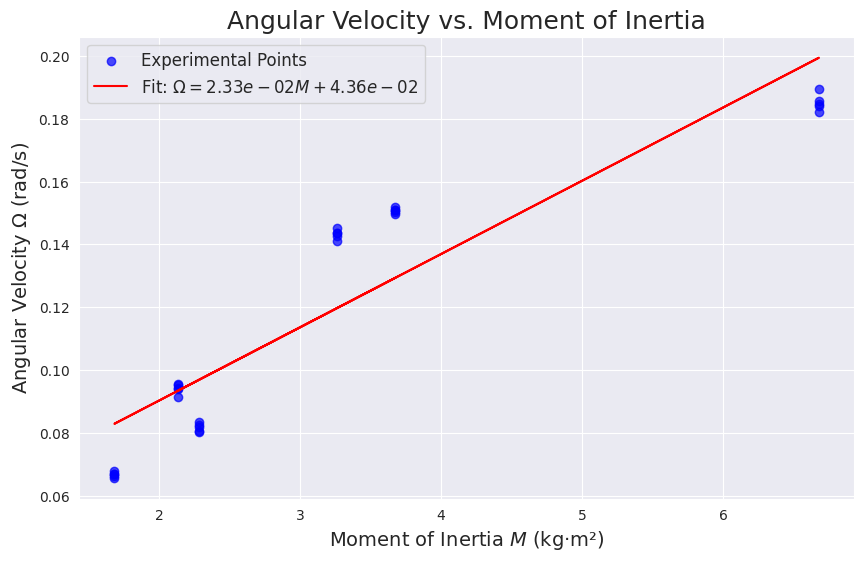

In [ ]:
M = data['momentum']
Omega = data['omega']
coefficients = np.polyfit(M, Omega, 1)
fitted_line = np.polyval(coefficients, M)

plt.figure(figsize=(10, 6))
plt.scatter(M, Omega, color='blue', label='Experimental Points', alpha=0.7)
plt.plot(M, fitted_line, color='red', label=f'Fit: $\Omega = {coefficients[0]:.2e}M + {coefficients[1]:.2e}$')
plt.xlabel('Moment of Inertia $M$ (kg·m²)', fontsize=14)
plt.ylabel('Angular Velocity $\Omega$ (rad/s)', fontsize=14)
plt.title('Angular Velocity vs. Moment of Inertia', fontsize=18)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()



`np.polyfit` also estimates errors! Specifically, it returns the covariance matrix for the least squares method. Without delving into the math, all you need to know is that the diagonal elements are the variances of the calculated coefficients. To get the actual error $\sigma$, take the square root of these variances.

Also, note the `W` parameter, which sets point weights for the estimate. If $y_{error}$ values are known, you can set weights as $W = 1 / y_{error}$ to get an even more precise line. To account for $x$ errors as well, you'd need other methods (but $y$ errors alone are likely sufficient).

Suppose there's been a mishap, and the errors have increased tenfold!

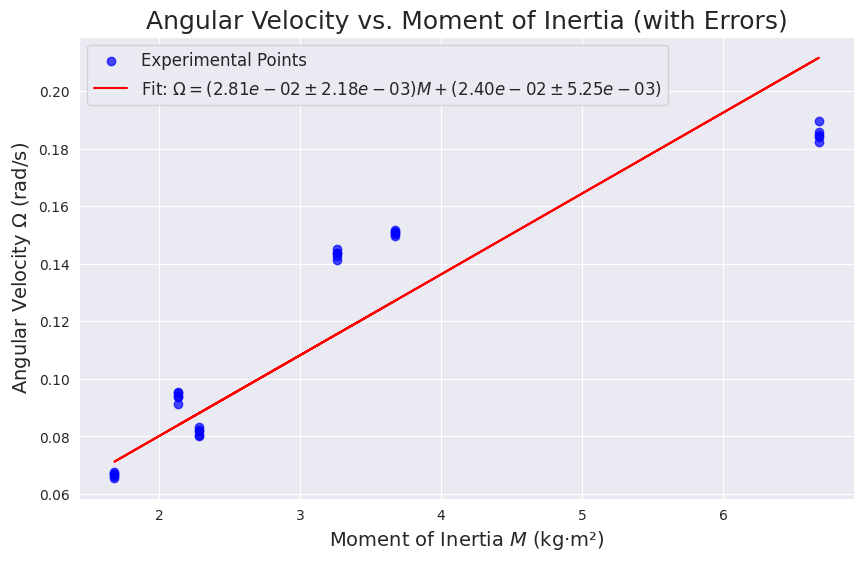

In [ ]:
data['sigma_omega'] *= 10
weights = 1 / data['sigma_omega']

coefficients, covariance_matrix = np.polyfit(M, Omega, 1, w=weights, cov=True)

errors = np.sqrt(np.diag(covariance_matrix))
fitted_line_with_errors = np.polyval(coefficients, M)
plt.figure(figsize=(10, 6))
plt.scatter(M, Omega, color='blue', label='Experimental Points', alpha=0.7)
plt.plot(M, fitted_line_with_errors, color='red', label=(
    f'Fit: $\Omega = ({coefficients[0]:.2e} \pm {errors[0]:.2e})M + '
    f'({coefficients[1]:.2e} \pm {errors[1]:.2e})$'
))

plt.xlabel('Moment of Inertia $M$ (kg·m²)', fontsize=14)
plt.ylabel('Angular Velocity $\Omega$ (rad/s)', fontsize=14)
plt.title('Angular Velocity vs. Moment of Inertia (with Errors)', fontsize=18)
plt.legend(fontsize=12)
plt.grid(True)

plt.show()

Now, you need to plot the dependence $\Omega_{down} (M_{down})$ <b>(not $\Omega(M)$!)</b> for points with error bars. In addition to plotting the line from the least squares estimate, include the error estimates for the coefficients. So, plot three lines: $k \cdot x + b$ from the LSM, $(k - \sigma_k) \cdot x + (b - \sigma_b)$, and $(k + \sigma_k) \cdot x + (b + \sigma_b)$, filling the area between these lines with shading (use `plt.fill_between` for this). Keep the rest of the styling as in the previous task.

_Note: Often in LSM, only the error for `k` is considered, leaving out `σ_b`._

<center><img src='https://drive.google.com/uc?export=view&id=1SriaMzJah7F610ocIK_O1-HqqtMQgxlg' width=600>

Example of the resulting graph</center>

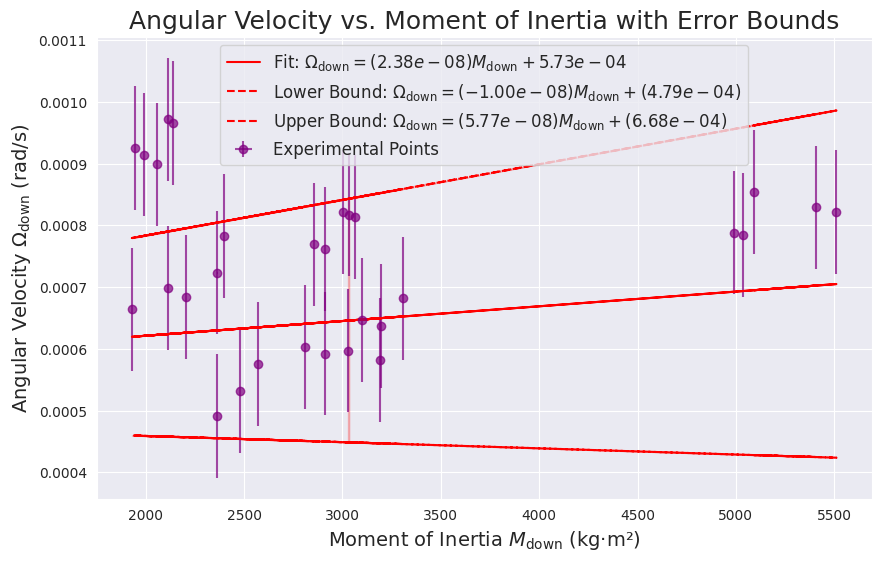

In [ ]:
Omega_down = data['omega_down']
M_down = data['momentum_down']

coefficients_down, covariance_matrix_down = np.polyfit(M_down, Omega_down, 1, w=weights, cov=True)

errors_down = np.sqrt(np.diag(covariance_matrix_down))

fit_line_down = np.polyval(coefficients_down, M_down)
lower_bound_line = np.polyval([coefficients_down[0] - errors_down[0], coefficients_down[1] - errors_down[1]], M_down)
upper_bound_line = np.polyval([coefficients_down[0] + errors_down[0], coefficients_down[1] + errors_down[1]], M_down)

plt.figure(figsize=(10, 6))

plt.errorbar(M_down, Omega_down, xerr=0.05, yerr=0.0001, fmt='o', color='purple', label='Experimental Points', alpha=0.7)

plt.plot(M_down, fit_line_down, color='red', label=f'Fit: $\\Omega_{{\\text{{down}}}} = ({coefficients_down[0]:.2e})M_{{\\text{{down}}}} + {coefficients_down[1]:.2e}$')

plt.plot(M_down, lower_bound_line, 'r--', label=f'Lower Bound: $\\Omega_{{\\text{{down}}}} = ({coefficients_down[0] - errors_down[0]:.2e})M_{{\\text{{down}}}} + ({coefficients_down[1] - errors_down[1]:.2e})$')
plt.plot(M_down, upper_bound_line, 'r--', label=f'Upper Bound: $\\Omega_{{\\text{{down}}}} = ({coefficients_down[0] + errors_down[0]:.2e})M_{{\\text{{down}}}} + ({coefficients_down[1] + errors_down[1]:.2e})$')

plt.fill_between(M_down, lower_bound_line, upper_bound_line, color='red', alpha=0.2)

plt.xlabel('Moment of Inertia $M_{\\text{down}}$ (kg·m²)', fontsize=14)
plt.ylabel('Angular Velocity $\\Omega_{\\text{down}}$ (rad/s)', fontsize=14)
plt.title('Angular Velocity vs. Moment of Inertia with Error Bounds', fontsize=18)
plt.legend(fontsize=12)
plt.grid(True)

plt.show()


# 3. Working with the Dataset (3 points)

The Iris dataset was used in R.A. Fisher's 1936 paper “The Use of Multiple Measurements in Taxonomic Problems” and is now commonly used by beginner data analysts.

The dataset includes three species of iris flowers, with 50 samples for each species, along with several properties of each flower. One species is linearly separable from the other two, but the latter two are not linearly separable from each other.

The columns in this dataset:

Identifier (Id) \\
Sepal length in cm (SepalLengthCm) \\
Sepal width in cm (SepalWidthCm) \\
Petal length in cm (PetalLengthCm) \\
Petal width in cm (PetalWidthCm) \\
Species (Species) \\

<font color='red'>Attention!</font> All plots in this part should be labeled!

In [ ]:
sns.set_style("darkgrid")

In [105]:
iris = sns.load_dataset('iris')
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Let's check how many different iris species we have—there should be three, with 50 samples each. Use `value_counts` to see the possible values in the species column.

In [107]:
species_counts = iris['species'].value_counts()
print(species_counts)

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


## 3.1 Petal Length and Width Plots

Let's examine whether petal width and length are related—use `sns.scatterplot` to display the OXY values. Remember to label the plot and the axes!

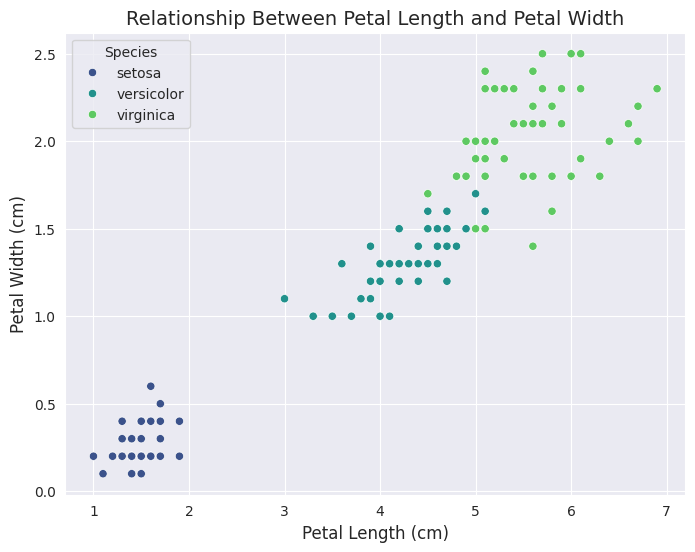

In [108]:
iris = sns.load_dataset('iris')
plt.figure(figsize=(8, 6))
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species', palette='viridis')

plt.title('Relationship Between Petal Length and Petal Width', fontsize=14)
plt.xlabel('Petal Length (cm)', fontsize=12)
plt.ylabel('Petal Width (cm)', fontsize=12)
plt.legend(title='Species')
plt.show()

What conclusions can you draw from the scatter plot? What is missing from the plot to make it more informative?

<font color='green'>CONCLUSION</font>

<font color='blue'>Petal length and width are positively related.</font>

<font color='green'>MISSING</font>

<font color='blue'>Gridlines for better readability.</font>

Let's try other plot types for the same purpose from the seaborn library—`sns.jointplot`, and also try to color the points based on iris species using `sns.facetgrid`. Display these two plots in the following cells and analyze them.

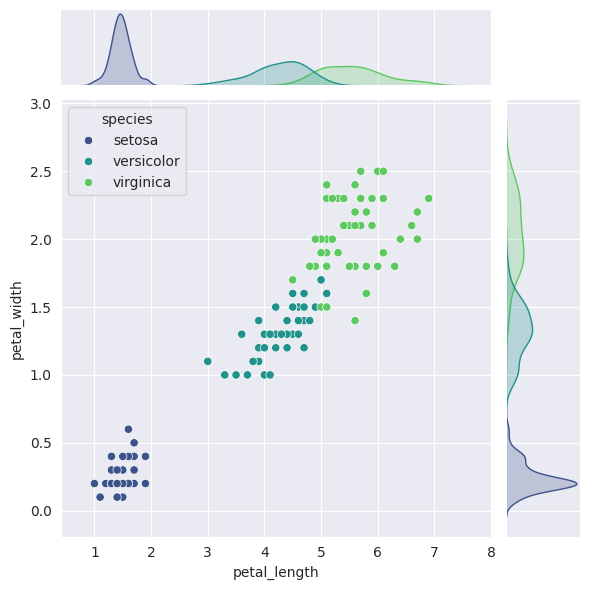

In [109]:
joint_plot = sns.jointplot(data=iris, x='petal_length', y='petal_width', hue='species', kind='scatter', palette='viridis')
plt.show()

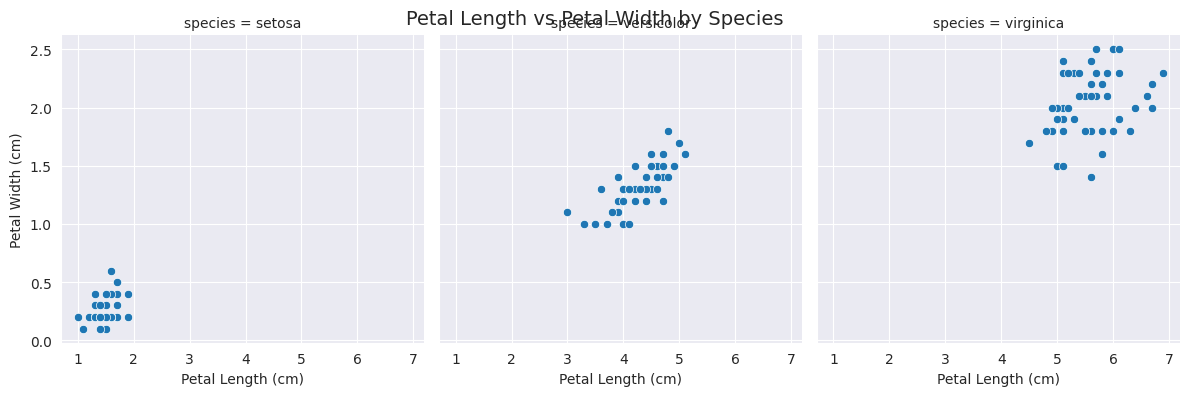

In [110]:
facet_grid = sns.FacetGrid(iris, col='species', height=4, aspect=1)
facet_grid.map(sns.scatterplot, 'petal_length', 'petal_width')
facet_grid.set_axis_labels('Petal Length (cm)', 'Petal Width (cm)')
facet_grid.fig.suptitle('Petal Length vs Petal Width by Species', fontsize=14)

plt.show()

What conclusions can you draw from these plots? Which of the three methods — scatterplot, jointplot, or facetgrid seems the best to you?

<font color='green'> CONCLUSION </font>

<font color='blue'> FacetGrid: Displays separate plots for each species, making it easy to compare how each species differs in petal length and width. Best for detailed species comparisons. </font>


## 3.2 Distribution Plots of Petal Length Values

Plot a “box-and-whisker plot” with `sns.boxplot` and its counterpart with `sns.violinplot`. The x-axis should represent the iris species, and the y-axis should represent petal length.

<ipython-input-111-37c521f25f0a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=iris, x='species', y='petal_length', palette='viridis')


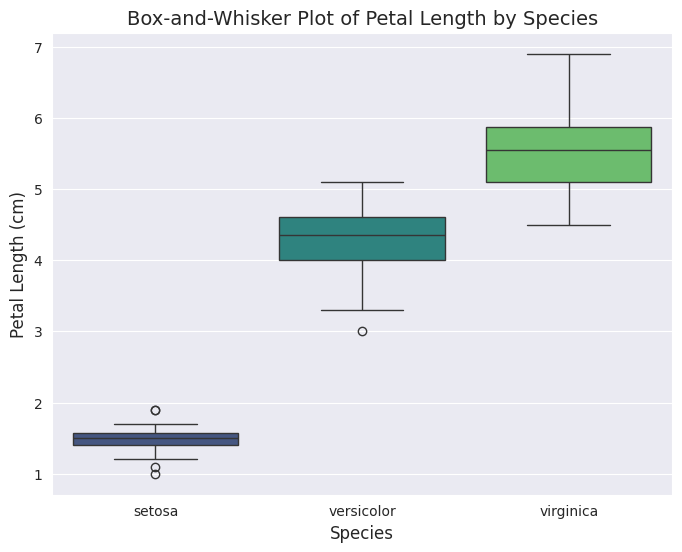

In [111]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=iris, x='species', y='petal_length', palette='viridis')

plt.title('Box-and-Whisker Plot of Petal Length by Species', fontsize=14)
plt.xlabel('Species', fontsize=12)
plt.ylabel('Petal Length (cm)', fontsize=12)

plt.show()

<ipython-input-112-946ec5cfec83>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=iris, x='species', y='petal_length', palette='viridis')


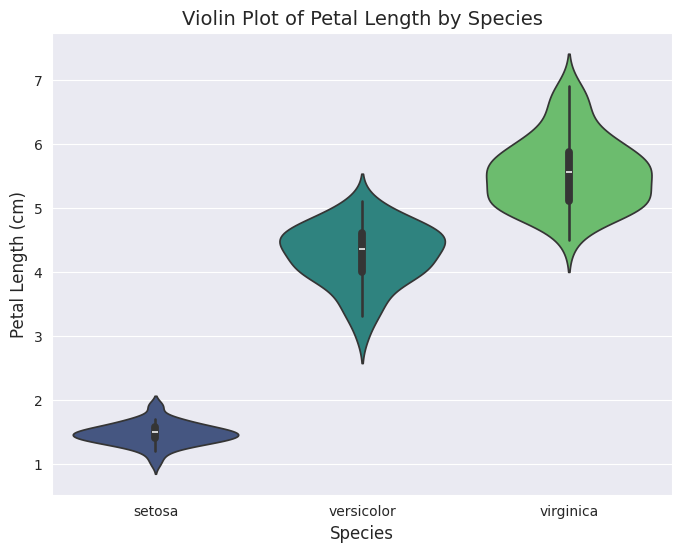

In [112]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=iris, x='species', y='petal_length', palette='viridis')

plt.title('Violin Plot of Petal Length by Species', fontsize=14)
plt.xlabel('Species', fontsize=12)
plt.ylabel('Petal Length (cm)', fontsize=12)

plt.show()

Compare the two types of plots. Which one is more informative, and which is more visually appealing in your opinion? What information can we gather from these plots?

<font color='green'> COMPARISON </font>

<font color='blue'> Boxplot: Simple and straightforward, but less detailed. </font>

<font color='blue'> Violin Plot: More visually appealing with a smooth, dynamic shape. </font>

<font color='green'> Violin Plot is better </font>

<font color='green'> Boxplot: Median, spread (IQR), and outliers.
Violin Plot: Distribution shape, density, median, spread, and outliers </font>

## 3.3 Pairwise Feature Comparison Plots


Let's create a 4x4 grid of plots where all possible pairs of features (petal length/width, sepal length/width) are displayed. Use `sns.pairplot`, and don't forget to specify the `hue` parameter.

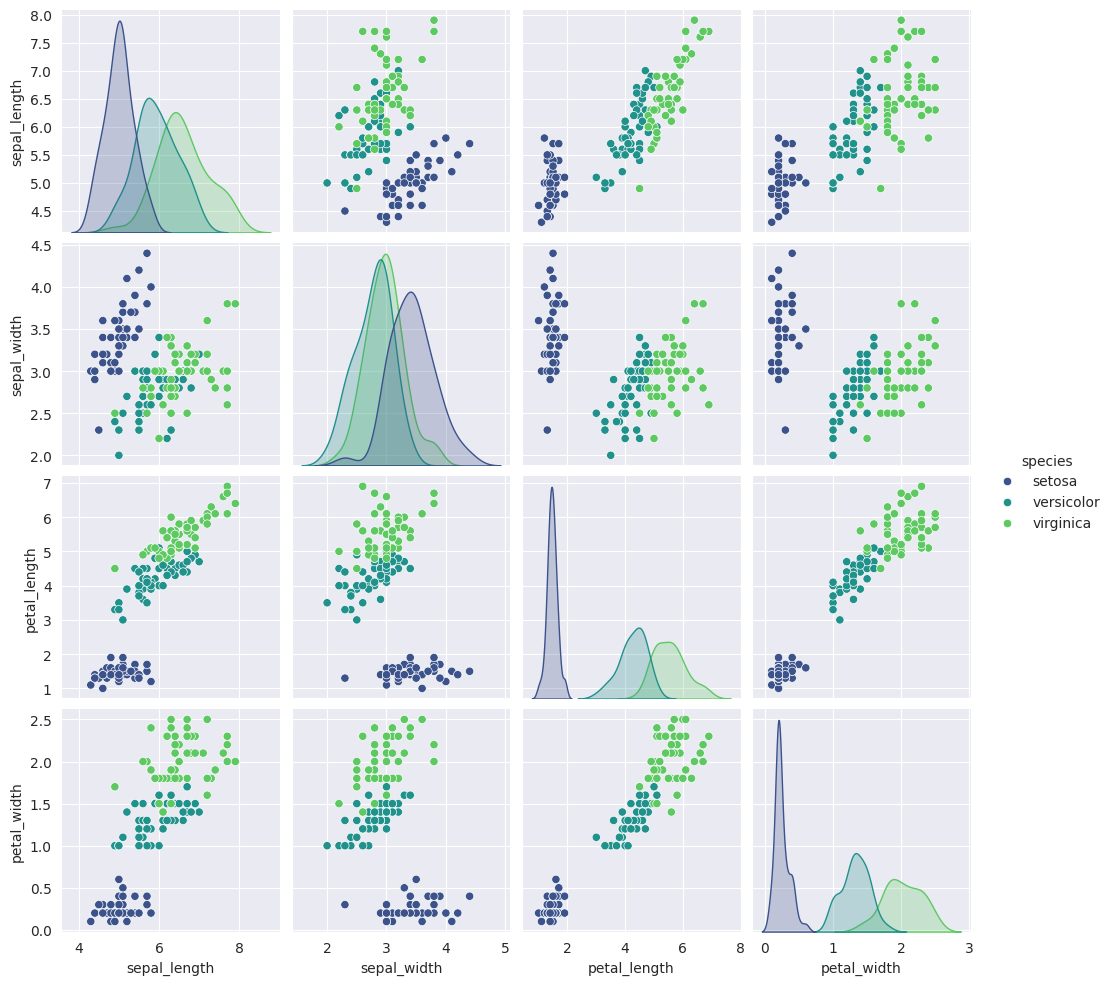

In [113]:
sns.pairplot(iris, hue='species', palette='viridis')
plt.show()

What information can you gather about the feature relationships from this plot?

<font color='red'> YOUR ANSWER HERE </font>

What plots are on the diagonal of this grid?

<font color='red'> histograms </font>

Try replacing the diagonal plots with potentially more informative ones (hint: `sns.pairplot` has a special parameter for this in the documentation). Display the resulting plot.

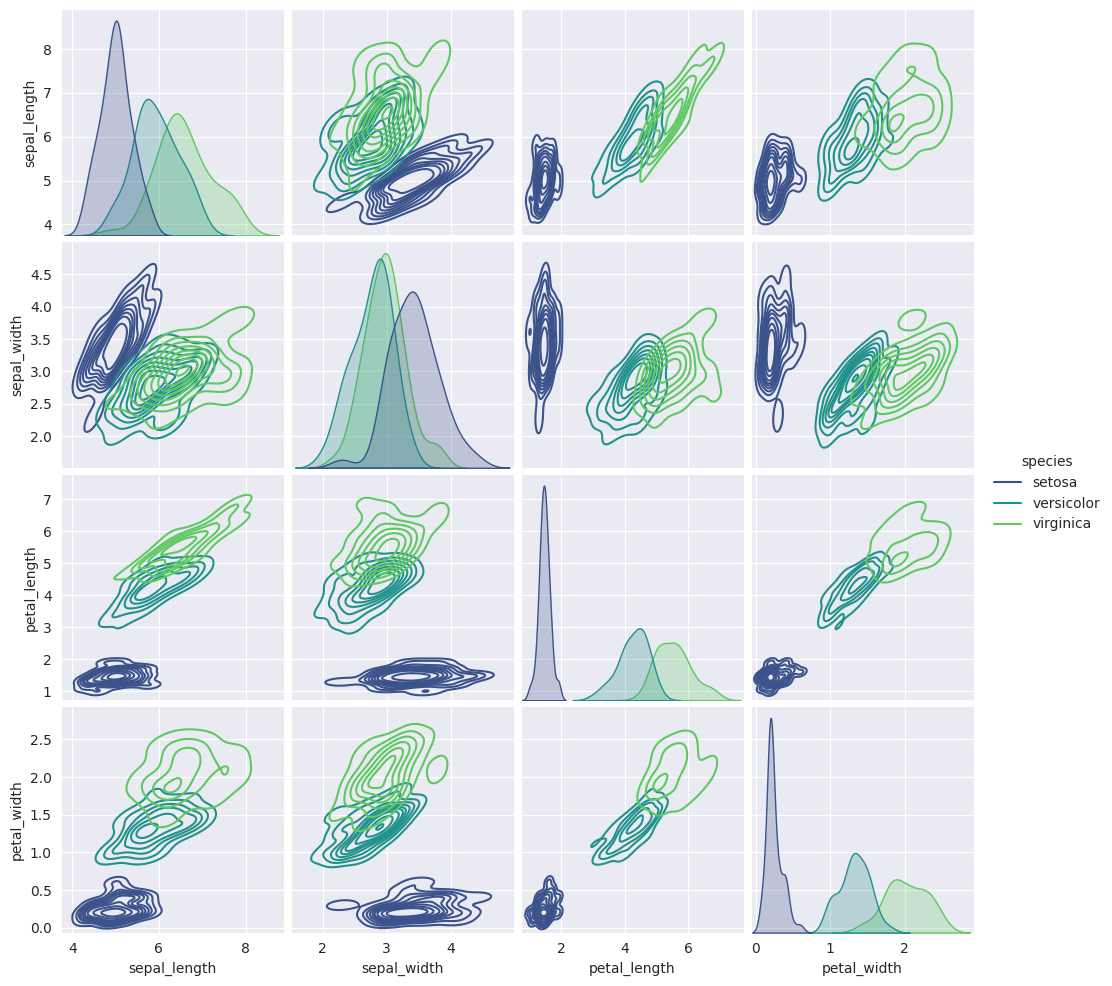

In [114]:
sns.pairplot(iris, hue='species', palette='viridis', kind='kde')
plt.show()

What plots are now on the diagonal? Does it seem more informative now?

<font color='red'> the Kernel Density Estimation of each feature for the different species </font>